In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datav3.csv')

In [2]:
question_map = {
    'Q1': 'gender',
    'Q2': 'age',
    'Q3': 'ethnic',
    'Q4': 'education',
    'Q7': 'AI_Support',  # Support for AI
    'Q8': 'AI_Trust', # Trust in AI
    'Q9': 'AI_Understanding', # Income level
    'Q10': 'AI_Impact',  # Perceived impact of AI on society
    'Q13': 'AI_Benefit',
    'Q14': 'AI_Efficiency',
    'Q15': 'AI_Optimism',  # People may be vulnerable to the risks of this technology now, but safety features are improving in ways that reduce their vulnerability
    'Q16': 'AI_Risk',
    'Q17': 'Transparency_Importance',  # Importance of transparency in AI
    'Q18': 'AI_Dependency', # society’s acceptance of it will increase
    'Q12': 'FOMO',  # Fear of missing out on AI advancements
    'Q19': 'income',
    'Q20': 'Party_ID',  # Political party identification
    'Q21': 'Ideology',  # Political ideology
    'Q22': 'religious',
    'Q24': 'State'  # State of residence
}
df = df.rename(columns=question_map)
df = df.dropna()

In [3]:
def party_label(code):
    if str(code) == '1':
        return 'Democrat'
    elif str(code) == '2':
        return 'Republican'
    elif str(code) == '3':
        return 'Independent'
    else:
        return 'Other'

df['Party_Label'] = df['Party_ID'].apply(party_label)

In [4]:
state_id_map = {
    1: 'Alabama', 2: 'Alaska', 3: 'Arizona', 4: 'Arkansas', 5: 'California', 6: 'Colorado',
    7: 'Connecticut', 8: 'Delaware', 9: 'Florida', 10: 'Georgia', 11: 'Hawaii', 12: 'Idaho',
    13: 'Illinois', 14: 'Indiana', 15: 'Iowa', 16: 'Kansas', 17: 'Kentucky', 18: 'Louisiana',
    19: 'Maine', 20: 'Maryland', 21: 'Massachusetts', 22: 'Michigan', 23: 'Minnesota', 24: 'Mississippi',
    25: 'Missouri', 26: 'Montana', 27: 'Nebraska', 28: 'Nevada', 29: 'New Hampshire', 30: 'New Jersey',
    31: 'New Mexico', 32: 'New York', 33: 'North Carolina', 34: 'North Dakota', 35: 'Ohio', 36: 'Oklahoma',
    37: 'Oregon', 38: 'Pennsylvania', 39: 'Rhode Island', 40: 'South Carolina', 41: 'South Dakota',
    42: 'Tennessee', 43: 'Texas', 44: 'Utah', 45: 'Vermont', 46: 'Virginia', 47: 'Washington',
    48: 'West Virginia', 49: 'Wisconsin', 50: 'Wyoming'
}
blue_states = ['California', 'New York', 'Illinois', 'New Jersey', 'Massachusetts', 'Maryland',
               'Hawaii', 'Connecticut', 'Rhode Island', 'Washington', 'Oregon', 'Vermont', 'Delaware']
red_states = ['Alabama', 'Arkansas', 'Idaho', 'Kansas', 'Kentucky', 'Louisiana', 'Mississippi',
              'Missouri', 'Montana', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Carolina',
              'South Dakota', 'Tennessee', 'Utah', 'West Virginia', 'Wyoming']
swing_states = ['Arizona', 'Georgia', 'Michigan', 'Nevada', 'North Carolina', 'Pennsylvania', 'Wisconsin']

df['State_Name'] = df['State'].map(state_id_map)
df['State_Color'] = df['State_Name'].apply(lambda x:
    'Blue' if x in blue_states else 'Red' if x in red_states else 'Swing' if x in swing_states else 'Other')

In [5]:
df['Democrat'] = df['Party_Label'].apply(lambda x: 1 if x == 'Democrat' else 0)
df['Republican'] = df['Party_Label'].apply(lambda x: 1 if x == 'Republican' else 0)
df['Independent'] = df['Party_Label'].apply(lambda x: 1 if x == 'Independent' else 0)

In [6]:
# save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

In [7]:
df.describe()

,gender,age,ethnic,education,Q5,AI_Support,AI_Trust,AI_Understanding,FOMO,AI_Benefit,...,AI_Dependency,income,Party_ID,Ideology,religious,Q23,State,Democrat,Republican,Independent
count,1007.000000,1007.000000,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,...,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1.512413,4.409136,5.16286,3.635551,1.003972,3.531281,3.377358,3.628600,3.357498,3.649454,...,3.842105,3.565045,2.075472,4.200596,4.323734,1.85005,24.445879,0.373386,0.268123,0.292949
std,0.504054,1.632010,1.40974,1.448674,0.062931,1.127447,1.151800,1.031847,1.155547,0.974454,...,0.913721,1.513192,1.023707,1.935716,3.414456,0.35720,14.864558,0.483944,0.443202,0.455342
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.00000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,1.000000,3.000000,1.000000,2.00000,9.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,6.00000,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,3.000000,2.000000,4.000000,3.000000,2.00000,25.000000,0.000000,0.000000,0.000000
75%,2.000000,6.000000,6.00000,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,3.000000,6.000000,9.000000,2.00000,38.000000,1.000000,1.000000,1.000000
max,3.000000,7.000000,6.00000,6.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,6.000000,5.000000,8.000000,10.000000,2.00000,50.000000,1.000000,1.000000,1.000000


/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_48410/567229220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Party_Label', y='AI_Support', data=df, palette='Set2')


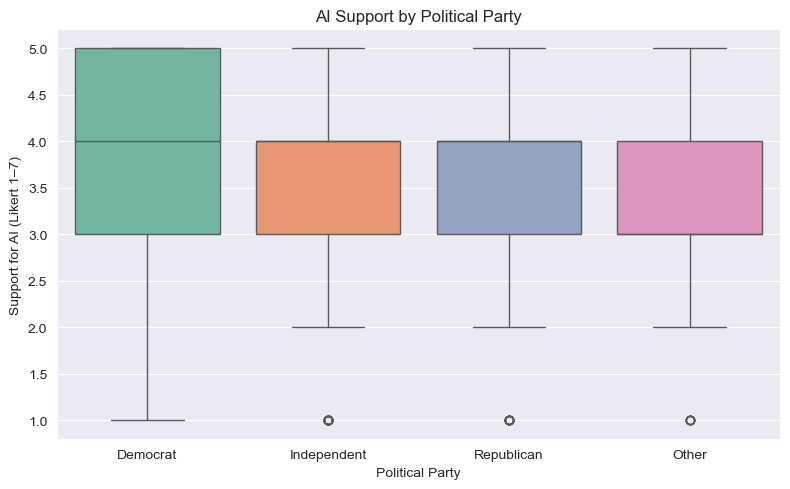

In [8]:
# Relationship between AI Support and Political Party
plt.figure(figsize=(8, 5))
sns.boxplot(x='Party_Label', y='AI_Support', data=df, palette='Set2')
plt.title('AI Support by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Support for AI (Likert 1–7)')
plt.tight_layout()
plt.show()

#### The boxplot analysis and t-tests revealed significant differences in AI support across political parties. Democrats showed higher support for AI compared to Republicans and Independents

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_48410/2358383458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Party_Label', y='AI_Trust', data=df, palette='Set2')


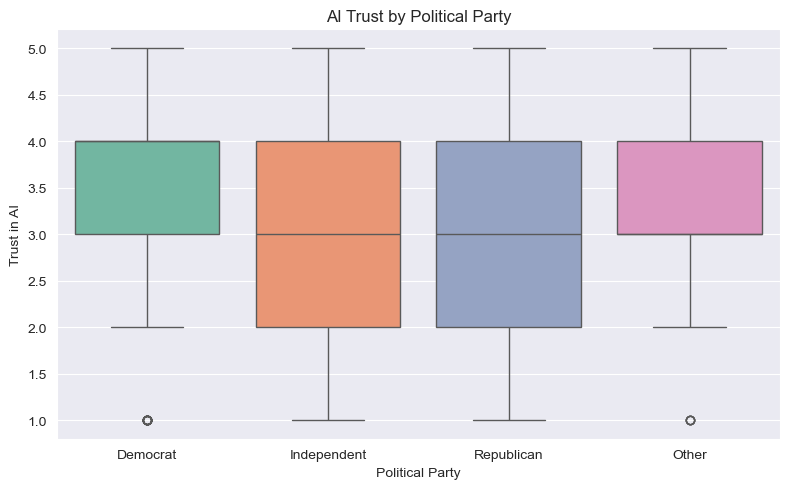

In [9]:
# Relationship between AI Trust and Political Party
plt.figure(figsize=(8, 5))
sns.boxplot(x='Party_Label', y='AI_Trust', data=df, palette='Set2')
plt.title('AI Trust by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Trust in AI')
plt.tight_layout()
plt.show()

#### Similar to AI support, Democrats exhibited higher trust in AI compared to other political groups.

In [10]:
from scipy.stats import ttest_ind

dems = df[df['Party_Label'] == 'Democrat']['AI_Support']
reps = df[df['Party_Label'] == 'Republican']['AI_Support']
inds = df[df['Party_Label'] == 'Independent']['AI_Support']

t_stat1, p_val1 = ttest_ind(dems, reps, nan_policy='omit')
t_stat2, p_val2 = ttest_ind(dems, inds, nan_policy='omit')
t_stat3, p_val3 = ttest_ind(reps, inds, nan_policy='omit')

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA model 1：AI support ~ party label
anova_model_1 = ols('AI_Support ~ Party_Label', data=df).fit()
anova_table_1 = sm.stats.anova_lm(anova_model_1, typ=2)
print("ANOVA results for AI Support by Party Label:")
print(anova_table_1)

# ANOVA model 2：AI trust ~ party label
anova_model_2 = ols('AI_Trust ~ Party_Label', data=df).fit()
anova_table_2 = sm.stats.anova_lm(anova_model_2, typ=2)
print("ANOVA results for AI Trust by Party Label:")
print(anova_table_2)

# ANOVA model 3：AI understanding~ party label
anova_model_3 = ols('AI_Understanding ~ Party_Label', data=df).fit()
anova_table_3 = sm.stats.anova_lm(anova_model_3, typ=2)
print("ANOVA results for AI Understanding by Party Label:")
print(anova_table_3)

ANOVA results for AI Support by Party Label:
                  sum_sq      df         F    PR(>F)
Party_Label    34.953402     3.0  9.395386  0.000004
Residual     1243.811246  1003.0       NaN       NaN
ANOVA results for AI Trust by Party Label:
                  sum_sq      df         F    PR(>F)
Party_Label    36.107345     3.0  9.296821  0.000005
Residual     1298.496429  1003.0       NaN       NaN
ANOVA results for AI Understanding by Party Label:
                  sum_sq      df        F    PR(>F)
Party_Label    17.446487     3.0  5.53594  0.000904
Residual     1053.649839  1003.0      NaN       NaN


#### ANOVA_model_1 results confirmed that political party affiliation significantly influences AI support.
#### ANOVA_model_2 results also indicated a significant relationship between political party and AI trust.

In [12]:
# Regression: AI Support ~  Democrat + Ideology + age + gender + income + religious + education
import statsmodels.formula.api as smf
support_model_1 = smf.ols('AI_Support ~ Democrat + Ideology + age + gender + income + religious + education', data=df).fit()
print(support_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             AI_Support   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     14.01
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           2.09e-17
Time:                        18:23:27   Log-Likelihood:                -1502.0
No. Observations:                1007   AIC:                             3020.
Df Residuals:                     999   BIC:                             3059.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1083      0.222     18.524      0.0

In [13]:
# Regression: AI Trust ~ Democrat + Ideology + age + gender + income + religious + education
trust_model_2 = smf.ols('AI_Trust ~ Democrat + Ideology + age + gender + income + religious + education', data=df).fit()
print(trust_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               AI_Trust   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     12.95
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           5.11e-16
Time:                        18:23:27   Log-Likelihood:                -1526.9
No. Observations:                1007   AIC:                             3070.
Df Residuals:                     999   BIC:                             3109.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0403      0.227     17.772      0.0

In [14]:
# Regression: AI Understanding ~ Democrat + Ideology + age + gender + income + religious + education
understanding_model_2 = smf.ols('AI_Understanding ~ Democrat + Ideology + age + gender + income + religious + education', data=df).fit()
print(understanding_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:       AI_Understanding   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     17.68
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           3.26e-22
Time:                        18:23:27   Log-Likelihood:                -1401.1
No. Observations:                1007   AIC:                             2818.
Df Residuals:                     999   BIC:                             2858.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5464      0.201     22.660      0.0

#### Regression models showed that political affiliation (Democrat or Republican), along with factors like ideology, age, gender, income, religious beliefs, and education, significantly predict both AI support and trust.
#### But the R² values were relatively low, indicating that these models explain only a small portion of the variance in AI support and trust. So we may need to consider mdeiation analysis to understand the underlying mechanisms.

In [15]:
import pingouin as pg

results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Benefit',
                                y='AI_Support',
                                alpha=0.05,
                                n_boot=5000)

print(results)

outcome_model = smf.ols('AI_Support ~ Democrat + AI_Benefit', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

             path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Benefit ~ X  0.287790  0.062864  5.282152e-06  0.164431   0.411150  Yes
1  Y ~ AI_Benefit  0.616109  0.030892  7.967872e-75  0.555489   0.676728  Yes
2           Total  0.383004  0.072488  1.552650e-07  0.240758   0.525250  Yes
3          Direct  0.209983  0.062529  8.140475e-04  0.087281   0.332686  Yes
4        Indirect  0.173021  0.038840  0.000000e+00  0.096615   0.251050  Yes
Outcome model R²: 0.29151754081757664


In [16]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Efficiency',
                                y='AI_Support',
                                alpha=0.05,
                                n_boot=5000)

print(results)

outcome_model = smf.ols('AI_Support ~ Democrat + AI_Efficiency', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

                path      coef        se          pval  CI[2.5%]  CI[97.5%]  \
0  AI_Efficiency ~ X  0.352838  0.070132  5.775764e-07  0.215216   0.490460   
1  Y ~ AI_Efficiency  0.567793  0.027293  3.218371e-80  0.514235   0.621352   
2              Total  0.383004  0.072488  1.552650e-07  0.240758   0.525250   
3             Direct  0.187265  0.061959  2.571399e-03  0.065681   0.308849   
4           Indirect  0.195739  0.040026  0.000000e+00  0.117923   0.274010   

   sig  
0  Yes  
1  Yes  
2  Yes  
3  Yes  
4  Yes  
Outcome model R²: 0.30731080127090904


In [17]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Risk',
                                y='AI_Support',
                                alpha=0.05,
                                n_boot=5000)

print(results)

outcome_model = smf.ols('AI_Support ~ Democrat + AI_Risk', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

          path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Risk ~ X  0.193559  0.063825  2.486326e-03  0.068314   0.318804  Yes
1  Y ~ AI_Risk  0.424908  0.033579  3.673890e-34  0.359016   0.490800  Yes
2        Total  0.383004  0.072488  1.552650e-07  0.240758   0.525250  Yes
3       Direct  0.303512  0.067926  8.780522e-06  0.170219   0.436804  Yes
4     Indirect  0.079492  0.026699  1.600000e-03  0.030197   0.136576  Yes
Outcome model R²: 0.15425093206187102


In [18]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Benefit',
                                y='AI_Trust',
                                alpha=0.05,
                                n_boot=5000)
print(results)

outcome_model = smf.ols('AI_Trust ~ Democrat + AI_Benefit', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

             path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Benefit ~ X  0.287790  0.062864  5.282152e-06  0.164431   0.411150  Yes
1  Y ~ AI_Benefit  0.614711  0.031846  7.316604e-71  0.552219   0.677204  Yes
2           Total  0.390962  0.074056  1.589149e-07  0.245640   0.536283  Yes
3          Direct  0.218517  0.064454  7.253571e-04  0.092038   0.344997  Yes
4        Indirect  0.172444  0.039035  0.000000e+00  0.096946   0.248949  Yes
Outcome model R²: 0.2787221118202633


In [22]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Efficiency',
                                y='AI_Trust',
                                alpha=0.05,
                                n_boot=5000)
print(results)

outcome_model = smf.ols('AI_Trust ~ Democrat + AI_Efficiency', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

                path      coef        se          pval  CI[2.5%]  CI[97.5%]  \
0  AI_Efficiency ~ X  0.352838  0.070132  5.775764e-07  0.215216   0.490460   
1  Y ~ AI_Efficiency  0.577041  0.027945  3.037734e-79  0.522204   0.631879   
2              Total  0.390962  0.074056  1.589149e-07  0.245640   0.536283   
3             Direct  0.192078  0.063438  2.526092e-03  0.067593   0.316564   
4           Indirect  0.198884  0.040668  0.000000e+00  0.119207   0.279664   

   sig  
0  Yes  
1  Yes  
2  Yes  
3  Yes  
4  Yes  
Outcome model R²: 0.3042391404497149


In [23]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Risk',
                                y='AI_Trust',
                                alpha=0.05,
                                n_boot=5000)
print(results)

outcome_model = smf.ols('AI_Trust ~ Democrat + AI_Risk', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

          path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Risk ~ X  0.193559  0.063825  2.486326e-03  0.068314   0.318804  Yes
1  Y ~ AI_Risk  0.415953  0.034527  2.566419e-31  0.348200   0.483706  Yes
2        Total  0.390962  0.074056  1.589149e-07  0.245640   0.536283  Yes
3       Direct  0.313291  0.069838  8.096518e-06  0.176246   0.450337  Yes
4     Indirect  0.077670  0.026986  4.800000e-03  0.026299   0.132403  Yes
Outcome model R²: 0.1433603011776987


In [24]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Benefit',
                                y='AI_Understanding',
                                alpha=0.05,
                                n_boot=5000)
print(results)

outcome_model = smf.ols('AI_Understanding ~ Democrat + AI_Benefit', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

             path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Benefit ~ X  0.287790  0.062864  5.282152e-06  0.164431   0.411150  Yes
1  Y ~ AI_Benefit  0.346394  0.031564  1.521845e-26  0.284455   0.408334  Yes
2           Total  0.236184  0.066843  4.289021e-04  0.105016   0.367352  Yes
3          Direct  0.139341  0.064097  2.994513e-02  0.013562   0.265121  Yes
4        Indirect  0.096843  0.023220  0.000000e+00  0.054952   0.145395  Yes
Outcome model R²: 0.11119588646987533


In [25]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Efficiency',
                                y='AI_Understanding',
                                alpha=0.05,
                                n_boot=5000)
print(results)

outcome_model = smf.ols('AI_Understanding ~ Democrat + AI_Efficiency', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

                path      coef        se          pval  CI[2.5%]  CI[97.5%]  \
0  AI_Efficiency ~ X  0.352838  0.070132  5.775764e-07  0.215216   0.490460   
1  Y ~ AI_Efficiency  0.331490  0.027987  2.176860e-30  0.276569   0.386410   
2              Total  0.236184  0.066843  4.289021e-04  0.105016   0.367352   
3             Direct  0.122224  0.063707  5.532617e-02 -0.002790   0.247238   
4           Indirect  0.113960  0.024237  0.000000e+00  0.067938   0.163211   

   sig  
0  Yes  
1  Yes  
2  Yes  
3   No  
4  Yes  
Outcome model R²: 0.12569530432491616


In [26]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Risk',
                                y='AI_Understanding',
                                alpha=0.05,
                                n_boot=5000)
print(results)

outcome_model = smf.ols('AI_Understanding ~ Democrat + AI_Risk', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

          path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Risk ~ X  0.193559  0.063825  2.486326e-03  0.068314   0.318804  Yes
1  Y ~ AI_Risk  0.297965  0.031726  3.832591e-20  0.235707   0.360222  Yes
2        Total  0.236184  0.066843  4.289021e-04  0.105016   0.367352  Yes
3       Direct  0.180144  0.064563  5.367642e-03  0.053449   0.306838  Yes
4     Indirect  0.056040  0.020516  4.000000e-03  0.020108   0.099693  Yes
Outcome model R²: 0.08775823267947924


#### Mediation analyses revealed that factors such as perceived AI benefits, efficiency, and risks partially mediate the relationship between political affiliation and AI support/trust.
#### For example, Democrats' higher AI support is partially explained by their perception of AI benefits and efficiency.
#### And we can see the R² values for the outcome models improved a lot, indicating that these mediators explain more variance in AI support and trust.

### Main conclusions:
#### 1. Political affiliation significantly influences AI support and trust, with Democrats showing higher levels compared to Republicans and Independents.
#### 2. Perceptions of AI benefits, risks, and efficiency are important mediators, suggesting that improving public understanding of AI's advantages and addressing concerns about risks could enhance societal acceptance of AI.